# Análisis Exploratorio de Datos (EDA) - Noticias Falsas vs Verdaderas

Este cuaderno presenta un análisis exploratorio de los conjuntos de datos de noticias proporcionados. El objetivo es entender la estructura, la calidad de los datos y patrones visuales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set_style('whitegrid')

## 1. Carga e Inspección Inicial de Datos
Cargamos los archivos `ntrue.csv` y `nfake.csv`, añadimos una etiqueta para distinguirlos y los unimos en un solo DataFrame.

In [8]:
df_true = pd.read_csv('ntrue.csv')
df_fake = pd.read_csv('nfake.csv')

df_true['clase'] = 'Verdadera'
df_fake['clase'] = 'Falsa'

# Unir datasets
df = pd.concat([df_true, df_fake]).reset_index(drop=True)

# Mostrar primeras filas
df_fake.head()

,title,text,subject,date,clase
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Falsa
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Falsa
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Falsa
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Falsa
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Falsa


In [9]:
df_true.head()

,title,text,subject,date,clase
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Verdadera
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Verdadera
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Verdadera
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Verdadera
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Verdadera


### Información del DataFrame
Revisamos tipos de datos y cantidad de registros.

In [3]:
print(f'Dimensiones del dataset: {df.shape}')
df.info()

Dimensiones del dataset: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   clase    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


**Conclusión (Estructura):**
El dataset combinado contiene información de noticias con columnas como título, texto, asunto y fecha. Es importante verificar que los tipos de datos sean correctos (ej. fecha como datetime).

## 2. Limpieza de Datos: Nulos y Duplicados

In [4]:
# Conteo de nulos
nulos = df.isnull().sum()
print("Valores Nulos por columna:")
print(nulos)

# Conteo de duplicados
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas totales: {duplicados}")

Valores Nulos por columna:
title      0
text       0
subject    0
date       0
clase      0
dtype: int64

Filas duplicadas totales: 209


**Conclusión (Calidad de Datos):**
- **Nulos:** Si existen valores nulos en el texto o título, esas filas podrían necesitar ser eliminadas o imputadas antes del modelado.
- **Duplicados:** Un número alto de duplicados puede sesgar un modelo de predicción. Se recomienda eliminarlos (`df.drop_duplicates()`) para asegurar la integridad del análisis.

## 3. Análisis Visual

### 3.1 Balance de Clases
Verificamos si el dataset está balanceado entre noticias falsas y verdaderas.

C:\Users\mmarco\AppData\Local\Temp\ipykernel_16932\2121749548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='clase', palette='viridis')


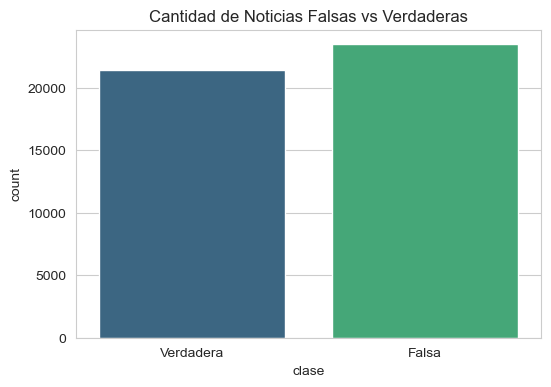

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='clase', palette='viridis')
plt.title('Cantidad de Noticias Falsas vs Verdaderas')
plt.show()

**Conclusión (Balance):**
Visualizar esta proporción es crítico. Si una clase domina sobre la otra, las métricas de precisión (accuracy) pueden ser engañosas.

### 3.2 Distribución por Tema (Subject)

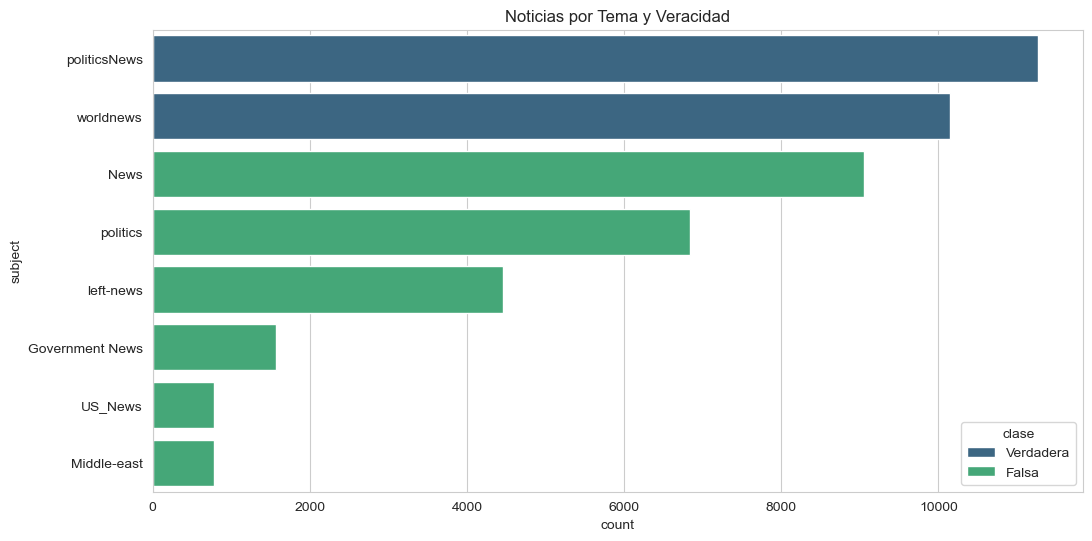

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='subject', hue='clase', palette='viridis', order=df['subject'].value_counts().index)
plt.title('Noticias por Tema y Veracidad')
plt.show()

**Conclusión (Temas):**
Este gráfico revela si las noticias falsas tienden a concentrarse en temas específicos (ej. política) en comparación con las noticias verdaderas. Ayuda a entender el contexto del dataset.

### 3.3 Longitud del Texto

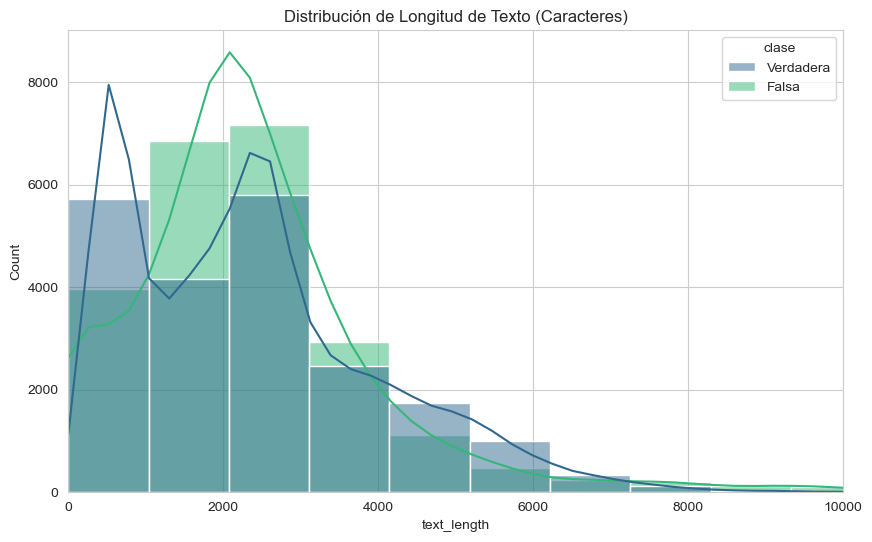

In [7]:
df['text_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='clase', kde=True, bins=50, palette='viridis')
plt.title('Distribución de Longitud de Texto (Caracteres)')
plt.xlim(0, 10000) # Limitar visualización para evitar outliers extremos
plt.show()

**Conclusión (Longitud):**
A menudo, las noticias falsas y verdaderas tienen diferencias estructurales. Si las curvas de densidad se separan, la longitud del texto podría ser una característica útil para un modelo de clasificación.